# Debbie Pao
## Lab 2

# Generating a phylogenetic tree:

After running "/Users/DebbiePao/Downloads/muscle3.8.31_i86darwin64 -in seqs.fa -out seqs.aligned.fa":

I noticed that the input file contains all lowercase letters of (a, c, t, g) and the output file contains all uppercase letters of (A, C, T, G) with dashes.

After running "/Users/DebbiePao/Downloads/FastTree -nt seqs.aligned.fa > tree.nwk": I got the file tree.nwk

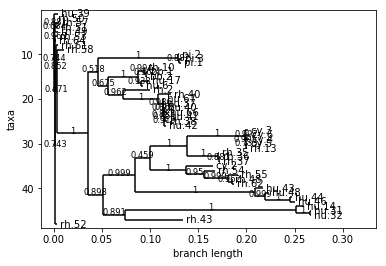

In [231]:
%matplotlib inline
from Bio import Phylo

tree = Phylo.read("tree.nwk", "newick")
Phylo.draw(tree)

Yes, as seen from the tree we see from Bio.Phylo, there are some around 4 obvious clusters. The cluster at the bottom seems further related to those than the rest.

From looking at the output tree, I have chosen one specimen from every cluster:
hu.39, rh.10, cy.3, and hu.42

In [232]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

my_seq = []
cluster1 = ['hu.39', 'rh.57', 'rh.49', 'rh.53', 'rh.64', 'rh.58']
cluster2  = ['rh.10', 'bb.1', 'bb.2', 'hu.17', 'hu.6']
cluster3 = ['rh.2', 'rh.40', 'hu.67', 'hu.37', 'hu.40', 'hu.66', 'hu.41', 'rh.38', 'hu.42']
cluster4 = ['cy.3','cy.6','cy.4', 'cy.5', 'rh.13']

for seq_rec in SeqIO.parse("seqs.aligned.fa", "fasta"):
    if (seq_rec.id == "hu.39"):
        print("hu.39 sequence ", seq_rec.seq)
        print(" ")
    if (seq_rec.id == "rh.10"):
        print("rh.10 sequence ", seq_rec.seq)
        print(" ")
    if (seq_rec.id == "cy.3"):
        print("cy.3 sequence ", seq_rec.seq)
        print(" ")
    if (seq_rec.id == "hu.42"):
        print("hu.42 sequence ", seq_rec.seq)
        print(" ")


hu.39 sequence  ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACCTGAAACCTGGAGCCCCGAAACCCAAAGCCAACCAGCAAAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAATCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGGCGCTAAGACGGCTCCTGGAAAGAAGAGACCGGTAGAGCCGTCACCACAGCGTTCCCCCGACTCCTCCACGGGCATCGGCAAGAAAGGCCAGCAGCCCGCCAGAAAGAGACTCAATTTCGGTCGGACTGGCGACTCAGAGTCAGTCCCCGACCCTCAACCTATCGGAGAACCTCCAGCAGCGCCCTCTAGTGTGGGATCTGGTACAATGGCTGCAGGCGGTGGCGCACCAATGGCAGACAATAACGAAGGTGCCGACGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTTATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAACGGGACCTCGGGAGGCAGCACCAACGACAACACCTACTTTGGCTACAGCACCCCCTGGGGGTATCTTGACTTTAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAAGAGACTCAGCTTCAAGCTCTTCAACATCCAGGTCAAAGAGGTCACGCAG

After BLASTing: here are the descriptions for each sequence of specimen:
* hu.39: Adeno-associated virus isolate hu.39 capsid protein VP1 (cap) gene, complete cds
* rh.10: Non-human primate Adeno-associated virus isolate AAVrh.10 capsid protein (VP1) gene, complete cds
* rh.52: Adeno-associated virus isolate hu.42 capsid protein VP1 (cap) gene, complete cds
* cy.3: Non-human primate Adeno-associated virus isolate AAVcy.3 capsid protein (VP1) gene, complete cds

We see that the adeno-associated virus is the most common among the different clusters. However, we might not trust
the solution that came from BLAST since I picked the specimens that I thought represented each cluster by eye so
the solution may not be accurate.

In [233]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Cluster 1:


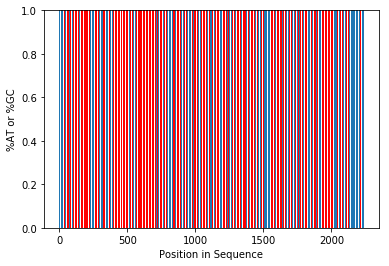

In [234]:
def calculateFraction(cluster):
    at_array = [0 for i in range(2238)]
    gc_array = [0 for j in range(2238)] 
    for sequence_id in cluster:
        sequences = []
        for info in SeqIO.parse("seqs.aligned.fa", "fasta"):
            if(info.id == sequence_id):
                sequences = info.seq
        for n in range(len(sequences)):
            curr = sequence[n]
            if curr == 'G' or curr == 'C' :
                gc_array[n] += 1
            if curr == 'A' or curr == 'T':
                at_array[n] += 1
    return at_array, gc_array

at_array1, gc_array1 = calculateFraction(cluster1)

print("Cluster 1:")

data = [0 for k in range(2238)]

for ind in range(2238):
    if at_array1[ind] + gc_array1[ind] == 0:
        data[ind] = 0
    else:
        data[ind] = (at_array1[ind] / (at_array1[ind] + gc_array1[ind]))

otherBarData = []
for m in range(2238):
    otherBarData += [1.0 - data[m]]

bar1 = plt.bar(np.arange(2238), data, 0.7)
bar2 = plt.bar(np.arange(2238), otherBarData, 0.7, bottom = data, color = 'red')
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')
plt.show()
        

Cluster 2:


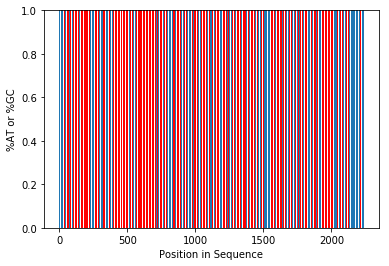

In [235]:
at_array2, gc_array2 = calculateFraction(cluster2)

print("Cluster 2:")

data = [0 for k in range(2238)]

for ind in range(2238):
    if at_array2[ind] + gc_array2[ind] == 0:
        data[ind] = 0
    else:
        data[ind] = (at_array2[ind] / (at_array2[ind] + gc_array2[ind]))

otherBarData = []
for m in range(2238):
    otherBarData += [1.0 - data[m]]

bar1 = plt.bar(np.arange(2238), data, 0.7)
bar2 = plt.bar(np.arange(2238), otherBarData, 0.7, bottom = data, color = 'red')
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')
plt.show()

Cluster 3:


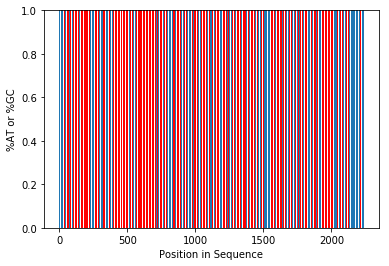

In [236]:
at_array3, gc_array3 = calculateFraction(cluster3)

print("Cluster 3:")

data = [0 for k in range(2238)]

for ind in range(2238):
    if at_array3[ind] + gc_array3[ind] == 0:
        data[ind] = 0
    else:
        data[ind] = (at_array3[ind] / (at_array3[ind] + gc_array3[ind]))

otherBarData = []
for m in range(2238):
    otherBarData += [1.0 - data[m]]

bar1 = plt.bar(np.arange(2238), data, 0.7)
bar2 = plt.bar(np.arange(2238), otherBarData, 0.7, bottom = data, color = 'red')
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')
plt.show()

Cluster 4:


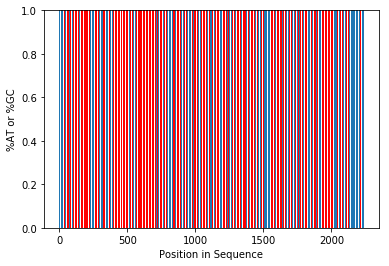

In [237]:
at_array4, gc_array4 = calculateFraction(cluster4)

print("Cluster 4:")

data = [0 for k in range(2238)]

for ind in range(2238):
    if at_array4[ind] + gc_array4[ind] == 0:
        data[ind] = 0
    else:
        data[ind] = (at_array4[ind] / (at_array4[ind] + gc_array4[ind]))

otherBarData = []
for m in range(2238):
    otherBarData += [1.0 - data[m]]

bar1 = plt.bar(np.arange(2238), data, 0.7)
bar2 = plt.bar(np.arange(2238), otherBarData, 0.7, bottom = data, color = 'red')
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')
plt.show()

# Boxplot:

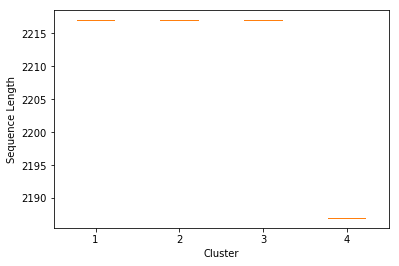

In [245]:
boxplot_data = [[] for t in range(4)]
for seq_id in cluster1:
    for record in SeqIO.parse("seqs.fa", "fasta"):
        if(record.id==seq_id):
            boxplot_data[0].append(len(record.seq))
for seq_id in cluster2:
    for record in SeqIO.parse("seqs.fa", "fasta"):
        if(record.id==seq_id):
            boxplot_data[1].append(len(record.seq))
for seq_id in cluster3:
    for record in SeqIO.parse("seqs.fa", "fasta"):
        if(record.id==seq_id):
            boxplot_data[2].append(len(record.seq))
for seq_id in cluster4:
    for record in SeqIO.parse("seqs.fa", "fasta"):
        if(record.id==seq_id):
            boxplot_data[3].append(len(record.seq))       
                
figure, axes = plt.subplots()
axes.boxplot(boxplot_data, 0, '')
axes.set_xlabel('Cluster')
axes.set_ylabel('Sequence Length')
plt.show()